In [1]:
# Market Sentiment vs Trader Behavior Analysis
# Candidate: Khushi Kapoor

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fear_greed = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")

fear_greed.head()

/tmp/ipython-input-1602657822.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("/content/historical_data.csv")


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
trades['trade_date'] = pd.to_datetime(trades['Timestamp'], unit='ms').dt.date
trades['trade_date'] = pd.to_datetime(trades['trade_date'])


In [5]:
merged = trades.merge(
    fear_greed[['date','classification']],
    left_on='trade_date',
    right_on='date',
    how='left'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,2024-10-27,Greed


In [6]:
merged.to_csv("merged_sentiment_trades.csv", index=False)

In [7]:
merged.to_csv("merged_sentiment_trades.csv", index=False)

In [8]:
merged.groupby('classification')['Closed PnL'].mean()

,Closed PnL
classification,
Extreme Greed,25.418772
Fear,70.932312
Greed,130.873196
Neutral,24.411566


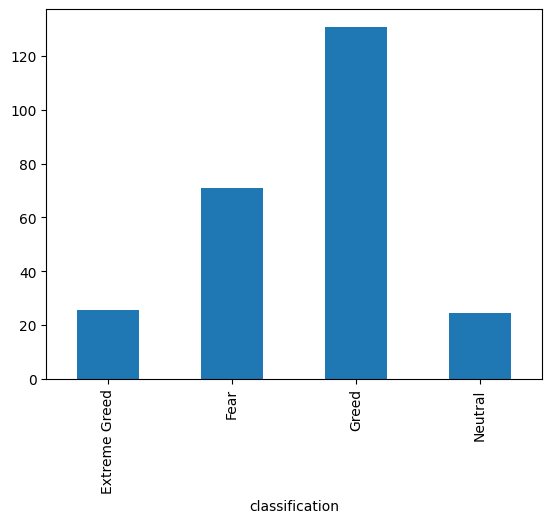

In [10]:
merged.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.savefig("volume_by_sentiment.png")
plt.show()

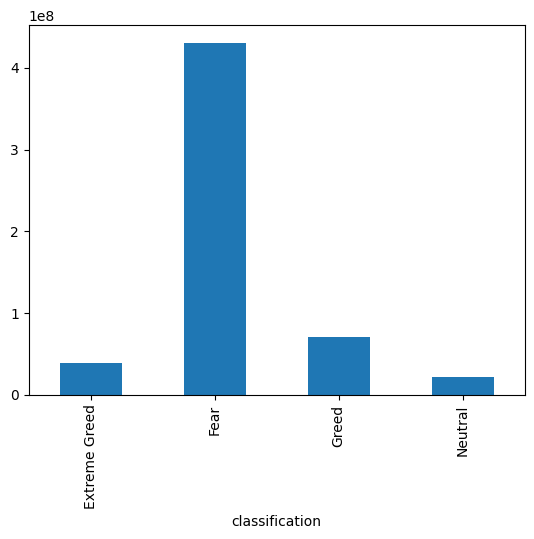

In [11]:
merged.groupby('classification')['Size USD'].sum().plot(kind='bar')
plt.savefig("volume_by_sentiment.png")
plt.show()